In [23]:
# 导入必要库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA


In [24]:
# 加载数据
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv("iris.data", header=None, names=columns)

# 数据预览
print("Dataset Preview:")
print(data.head())

# 打印统计信息
print("\nDataset Statistics:")
print(data.describe())

# 分离特征和标签
X = data.drop(columns=["class"])
y = data["class"]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


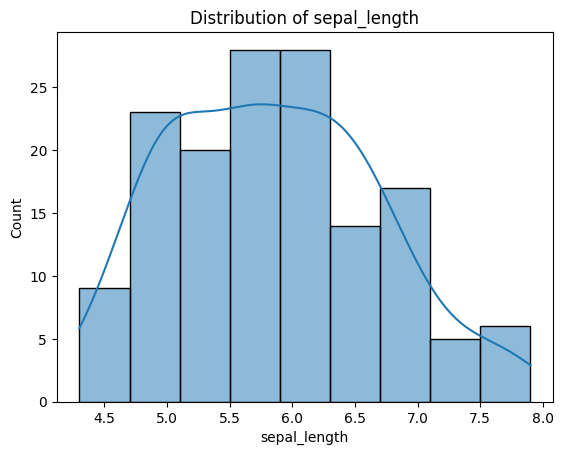

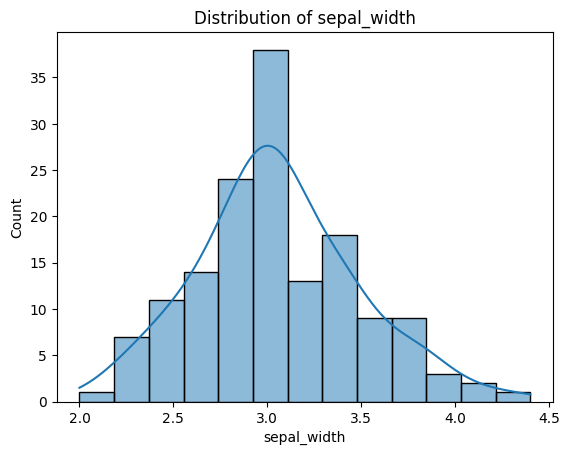

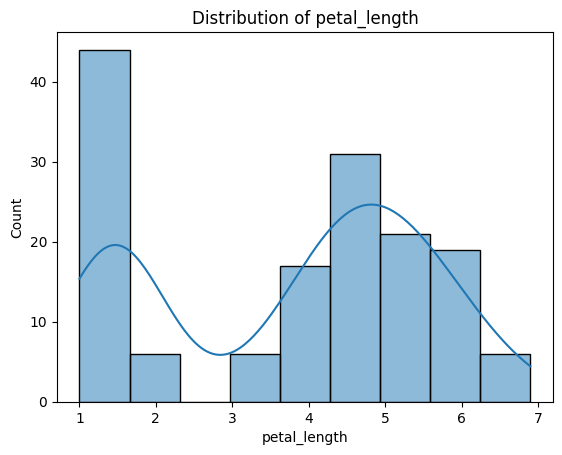

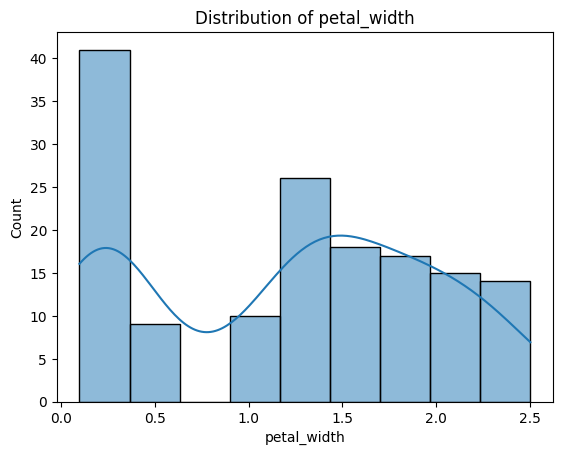

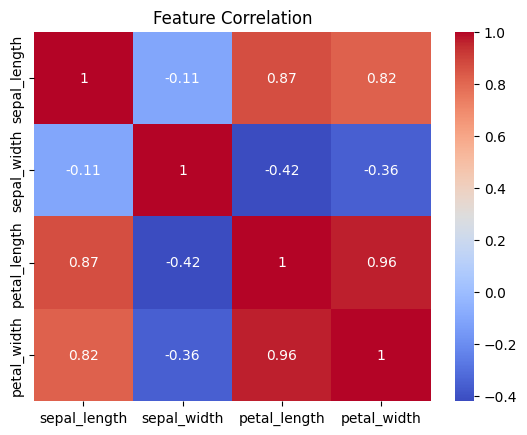

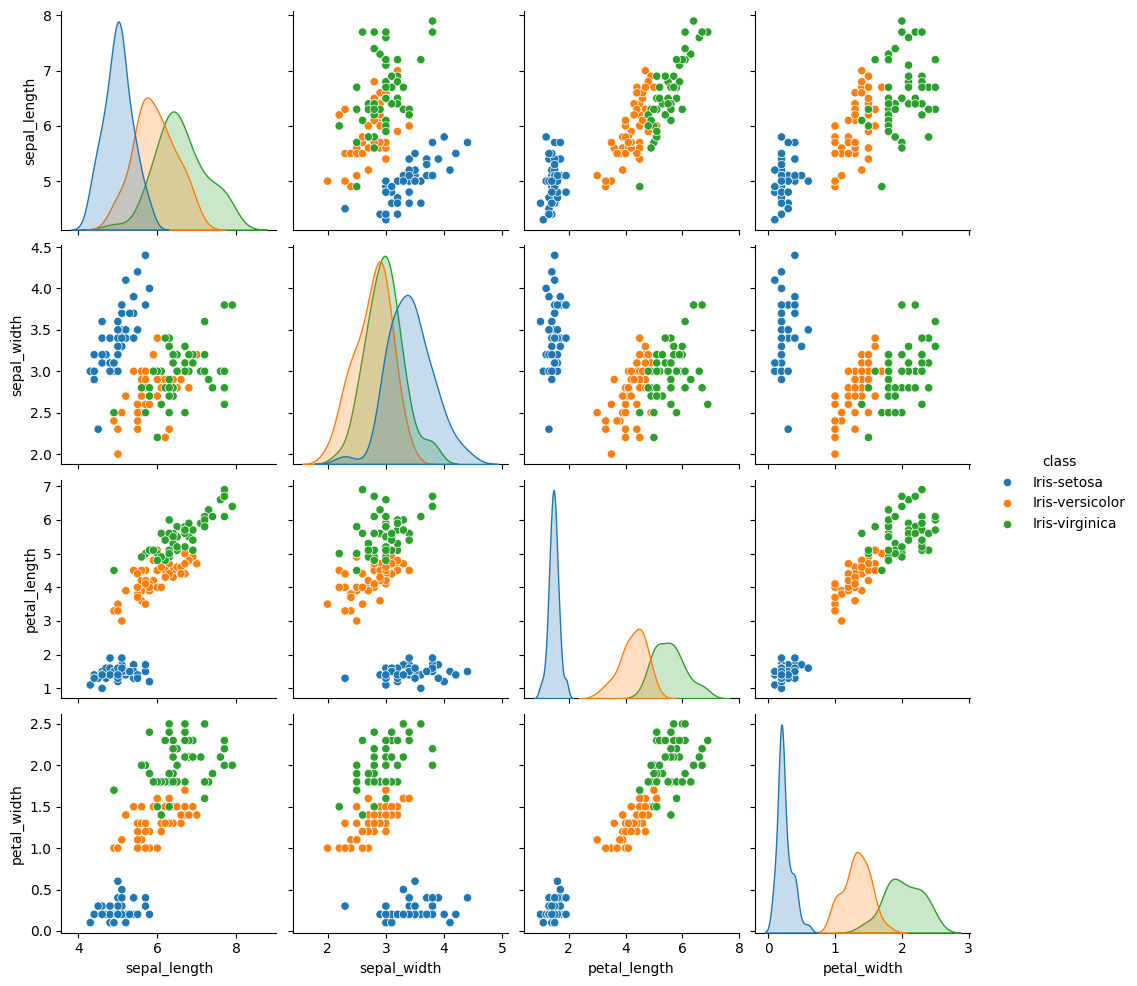

In [25]:
# 数据探索性分析 (EDA)
# 1. 特征分布直方图
for column in X.columns:
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# 2. 特征相关性热力图
corr = X.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# 3. 特征两两关系的散点图矩阵
sns.pairplot(data, hue="class")
plt.show()


In [26]:
# 1. K-Means 聚类
print("\nOptimizing K-Means...")
kmeans_results = []
for n_clusters in range(2, 6):  # 测试簇数 2 到 5
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    adjusted_rand = adjusted_rand_score(y, labels)
    kmeans_results.append((n_clusters, silhouette, adjusted_rand))

# 输出 K-Means 最优结果
best_kmeans = max(kmeans_results, key=lambda x: x[1])  # 根据 Silhouette Score 选择最优
print(f"Best K-Means - n_clusters: {best_kmeans[0]}, Silhouette Score: {best_kmeans[1]:.2f}, Adjusted Rand Index: {best_kmeans[2]:.2f}")


Optimizing K-Means...
Best K-Means - n_clusters: 2, Silhouette Score: 0.58, Adjusted Rand Index: 0.57


In [27]:
# 2. 层次聚类
print("\nOptimizing Hierarchical Clustering...")
hierarchical_results = []
for n_clusters in range(2, 6):  # 测试簇数 2 到 5
    model = linkage(X_scaled, method="ward")
    labels = fcluster(model, t=n_clusters, criterion="maxclust")
    silhouette = silhouette_score(X_scaled, labels)
    adjusted_rand = adjusted_rand_score(y, labels)
    hierarchical_results.append((n_clusters, silhouette, adjusted_rand))

# 输出 Hierarchical 最优结果
best_hierarchical = max(hierarchical_results, key=lambda x: x[1])  # 根据 Silhouette Score 选择最优
print(f"Best Hierarchical - n_clusters: {best_hierarchical[0]}, Silhouette Score: {best_hierarchical[1]:.2f}, Adjusted Rand Index: {best_hierarchical[2]:.2f}")


Optimizing Hierarchical Clustering...
Best Hierarchical - n_clusters: 2, Silhouette Score: 0.58, Adjusted Rand Index: 0.54


In [28]:
# 3. DBSCAN 聚类
print("\nOptimizing DBSCAN...")
dbscan_results = []
eps_values = [0.5, 0.8, 1.0, 1.2, 1.5]
min_samples_values = [3, 5, 7, 10]
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X_scaled, labels)
            adjusted_rand = adjusted_rand_score(y, labels)
            dbscan_results.append((eps, min_samples, silhouette, adjusted_rand))

# 输出 DBSCAN 最优结果
if dbscan_results:
    best_dbscan = max(dbscan_results, key=lambda x: x[2])  # 根据 Silhouette Score 选择最优
    print(f"Best DBSCAN - eps: {best_dbscan[0]}, min_samples: {best_dbscan[1]}, Silhouette Score: {best_dbscan[2]:.2f}, Adjusted Rand Index: {best_dbscan[3]:.2f}")
else:
    print("DBSCAN - No valid clustering found.")


Optimizing DBSCAN...
Best DBSCAN - eps: 1.5, min_samples: 3, Silhouette Score: 0.58, Adjusted Rand Index: 0.57


In [29]:
# 4. Gaussian Mixture Model (GMM)
print("\nApplying Gaussian Mixture Model...")
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
gmm_ari = adjusted_rand_score(y, gmm_labels)
print(f"GMM - Silhouette Score: {gmm_silhouette:.2f}, Adjusted Rand Index: {gmm_ari:.2f}")


Applying Gaussian Mixture Model...
GMM - Silhouette Score: 0.41, Adjusted Rand Index: 0.51


In [30]:
# 5. Spectral Clustering
print("\nApplying Spectral Clustering...")
spectral = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)
spectral_silhouette = silhouette_score(X_scaled, spectral_labels)
spectral_ari = adjusted_rand_score(y, spectral_labels)
print(f"Spectral Clustering - Silhouette Score: {spectral_silhouette:.2f}, Adjusted Rand Index: {spectral_ari:.2f}")


Applying Spectral Clustering...
Spectral Clustering - Silhouette Score: 0.38, Adjusted Rand Index: 0.42


In [31]:
# 可视化聚类结果
# 降维至 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", s=50)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.show()

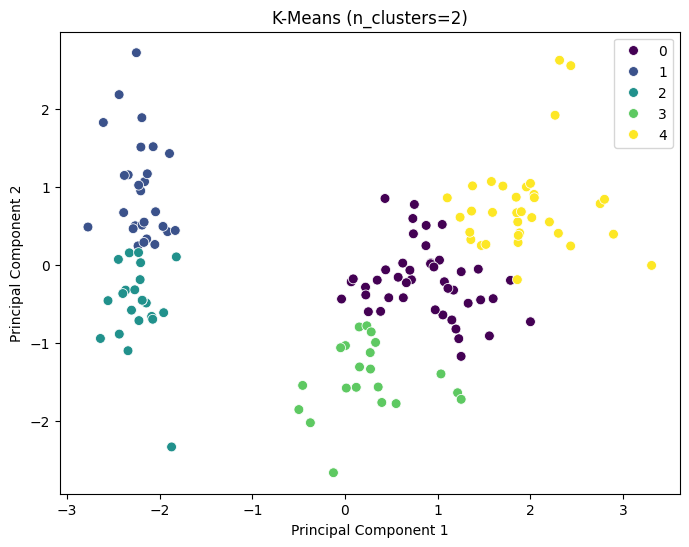

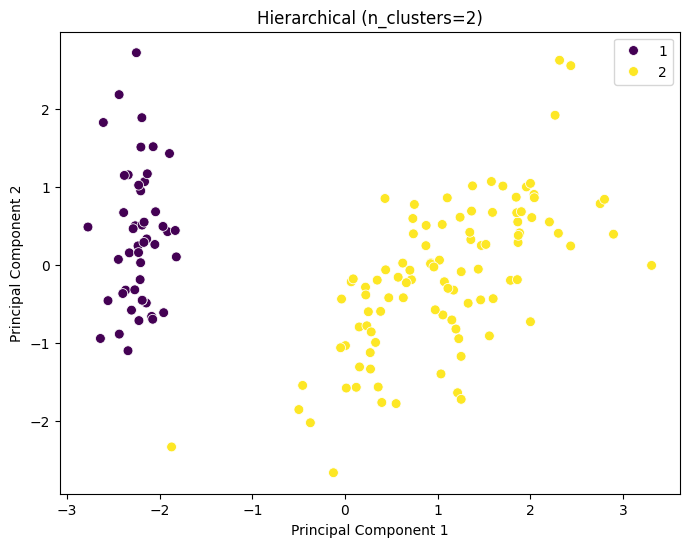

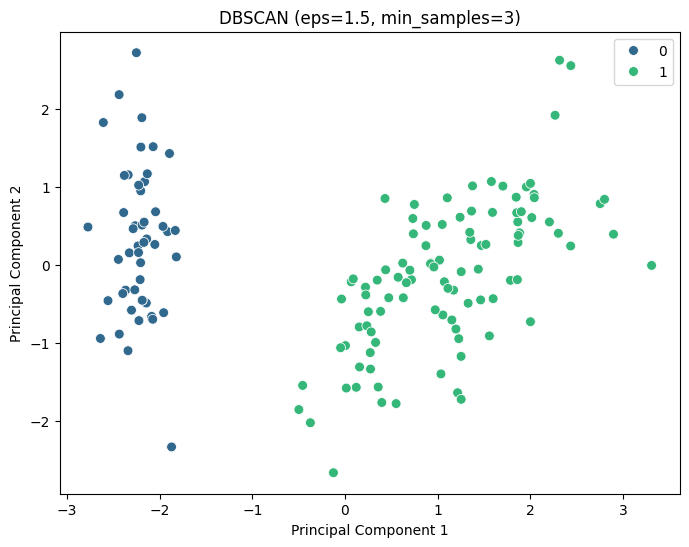

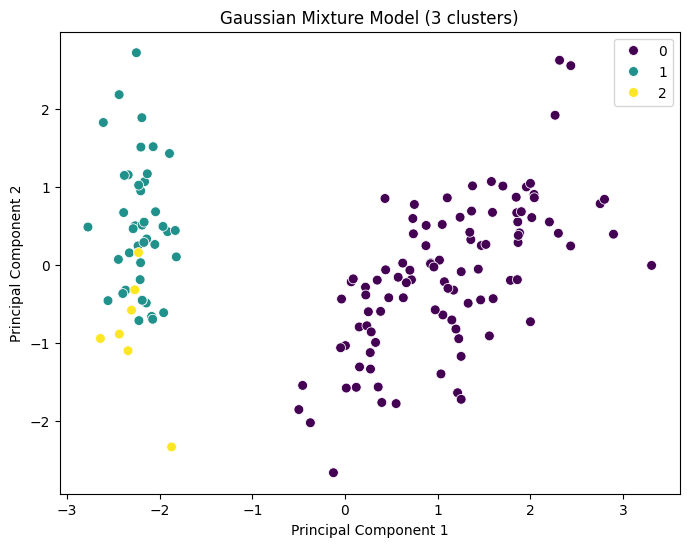

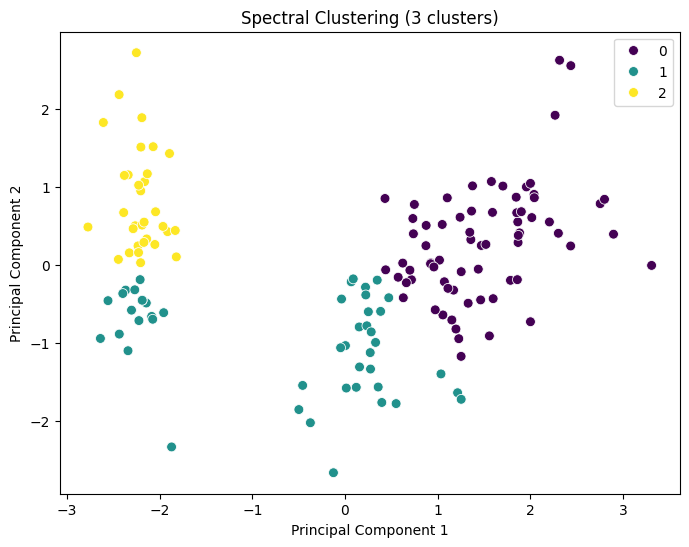

In [32]:
# 可视化各算法结果
plot_clusters(X_pca, kmeans.labels_, f"K-Means (n_clusters={best_kmeans[0]})")
plot_clusters(X_pca, fcluster(model, t=best_hierarchical[0], criterion="maxclust"), f"Hierarchical (n_clusters={best_hierarchical[0]})")

# 可视化 DBSCAN 聚类
if dbscan_results:
    dbscan = DBSCAN(eps=best_dbscan[0], min_samples=best_dbscan[1])
    dbscan_labels = dbscan.fit_predict(X_scaled)
    plot_clusters(X_pca, dbscan_labels, f"DBSCAN (eps={best_dbscan[0]}, min_samples={best_dbscan[1]})")

plot_clusters(X_pca, gmm_labels, "Gaussian Mixture Model (3 clusters)")
plot_clusters(X_pca, spectral_labels, "Spectral Clustering (3 clusters)")